# exploratory data analysis of samplesuperstore

In [4]:
#importing the required package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [5]:
data=pd.read_csv("store.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

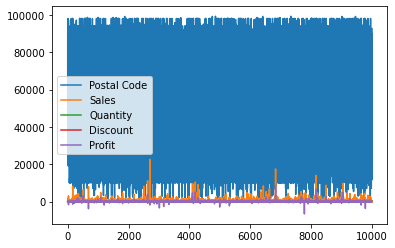

In [7]:
data.plot();

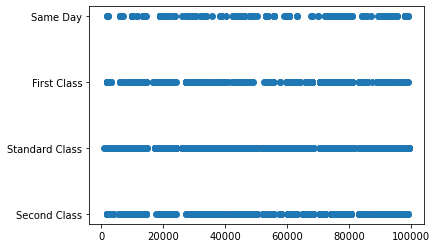

In [8]:
fig,ax=plt.subplots()
ax.scatter(data["Postal Code"],data["Ship Mode"]);

In [9]:
data.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [11]:
#checking duplicate data
duplicate=data.duplicated()
duplicate.sum()

17

In [12]:
data[duplicate]#checking for the duplicte values

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


In [13]:
#dropping the duplicate values
data.drop_duplicates(inplace=True)

In [14]:
data.duplicated().sum()

0

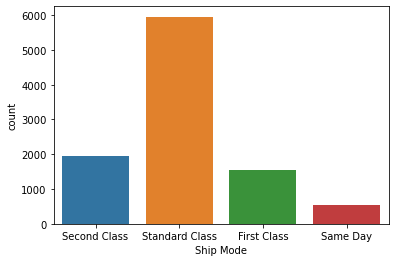

In [15]:
sns.countplot(x="Ship Mode",data=data);

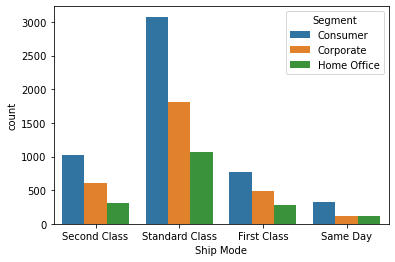

In [16]:
sns.countplot(x="Ship Mode",hue="Segment",data=data);

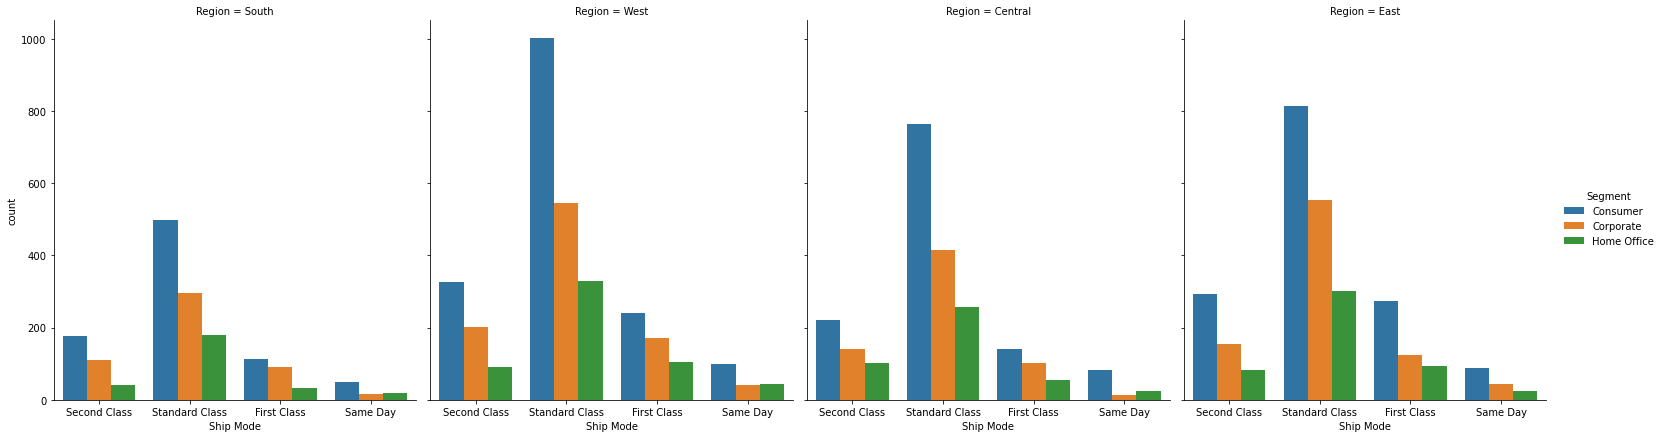

In [17]:
#distribution over the regions
sns.catplot(x="Ship Mode",hue="Segment",col="Region",data=data,kind="count",height=6,aspect=.9);

In [18]:
data["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

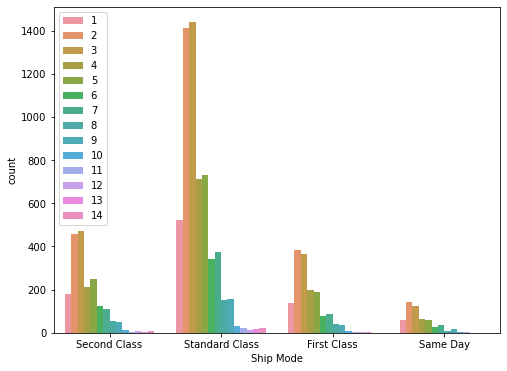

In [19]:
fig,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x="Ship Mode",hue="Quantity",data=data)
ax.legend();

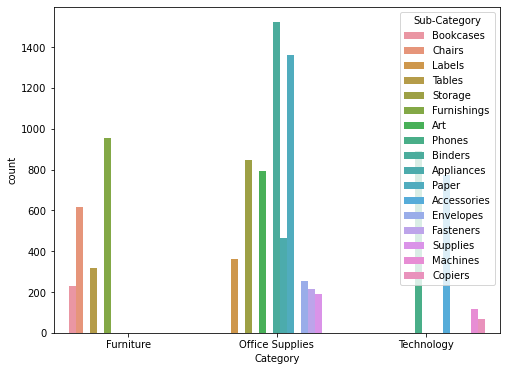

In [20]:
fig,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x="Category",hue="Sub-Category",orient="h",data=data)

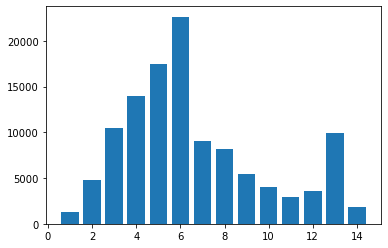

In [21]:
plt.bar(data.Quantity,data.Sales);

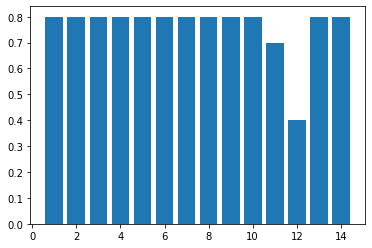

In [22]:


plt.bar(data.Quantity,data.Discount);

In [23]:
data.Discount.unique()

array([0.  , 0.45, 0.2 , 0.8 , 0.3 , 0.5 , 0.7 , 0.6 , 0.32, 0.1 , 0.4 ,
       0.15])

In [24]:
gal=data.iloc[:,7:13]
gal.head()

,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [25]:
gal

,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...
9989,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Technology,Phones,258.5760,2,0.20,19.3932
9992,Office Supplies,Paper,29.6000,4,0.00,13.3200


<AxesSubplot:xlabel='Profit', ylabel='count'>

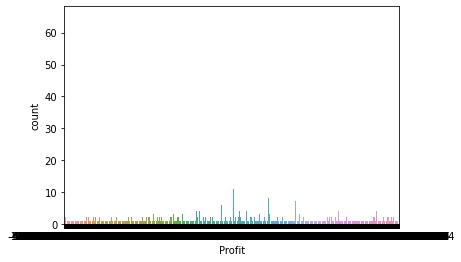

In [28]:
sns.countplot(x='Profit',data=data);

## from the above analysis the equal discounts are given for low exporting products reducing discounts for low selling products can increase theprofit

### done by savitha



### with regards,The Sparks Foundation